In [1]:
import os
import sys
import time
from collections import OrderedDict

import numpy as np
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from colorspacious import cspace_converter

from PIL import Image
from PIL import TiffImagePlugin as tip

sys.path.insert(0, '../src/')
sys.path.insert(0, 'scalygraphic/src/')

from im_scale_products import *
from impute_color import *


dir_path /Users/mojo/git_clone/dlanier/scalygraphic/notebookExperimental
center_point 0j
zoom 0.5
theta 1.5707963267948966
it_max 255
scale_dist 12
max_d 24.0
n_rows 256
n_cols 256
Using Equation parameters:
 [0.12350083232, 0.378832330115, 0.825066681155, 1.531812539278, 2.928196237476, 5.071776879804] 

             ET                            Zd                            Zr


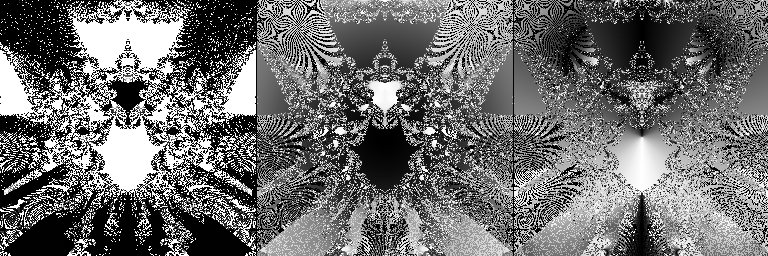

In [2]:
results_dir = '../../results'
run_parameters = get_default_run_parameters(results_dir=None)
run_parameters['theta'] = np.pi / 2
if os.path.isdir(run_parameters['dir_path']) == False:
    os.makedirs(run_parameters['dir_path'])
    
run_parameters['it_max'] = 255

for k, v in run_parameters.items():
    print(k, v)
    
fcn_name = 'plC6'
eq = name_functionhandle_dict[number_function_name_dict[fcn_name]][1]
p = eq(0, None)

print('Using Equation parameters:\n',p,'\n')

list_tuple = [(eq, (p))]

t0 = time.time()
ET_1, Z_1, Z0_1 = eq_iter.get_primitives(list_tuple, run_parameters)
tt = time.time() - t0
# print(tt, 's\ndata matrices size = ', ET_1.shape)

Zd_n2, Zr_n2, ETn_n2 = etg_norm(Z0_1, Z_1, ET_1)

g_im_et = primitive_2_gray(ETn_n2)
# complex result vectors: distance component
g_im_Zd = primitive_2_gray(Zd_n2)

# complex result vectors: rotation component
g_im_Zr = primitive_2_gray(Zr_n2)

im_list = [g_im_et,g_im_Zd,g_im_Zr]
new_im = cat_im_list_hori(im_list)

print('%15s%30s%30s'%('ET','Zd','Zr'))
display(new_im)

```c
# %load /Users/mojo/Pictures/Explorations/SpankyTank/plC6.m

function da_pixelValue = plC6(Z,S_lim,B_lim,c)

count = 1;
while count < S_lim && abs(Z) < B_lim
Z = Z^(2*Z^(c(1)^(Z^c(2))^(Z^c(3))^(Z^c(4))^(Z^c(5))^(Z^c(6))));
  count = count + 1;
end

da_pixelValue = count;             % the limit set value m, n
```

```python
# 589 plC6.atsty_35.tif
['-0.524527322488','-0.420473623983','-0.650931501985','0.211008985139','0.927747812261','-0.160908278236']
# 1318 plC6.atsty_64.tif
['-1.079847246381','0.634126486713','-1.303176653109','-1.315737003538','1.640945943726','-0.030052930779']
# 1995 plC6.atsty_12.tif
['0.123500832320','0.378832330115','0.825066681155','1.531812539278','2.928196237476','5.071776879804']
```

In [ ]:
S = 'Z^(2*Z^(c(1)^(Z^c(2))^(Z^c(3))^(Z^c(4))^(Z^c(5))^(Z^c(6))))'
S = S.replace('c', 'p')
for n in range(6):
    S = S.replace(str(n+1),str(n))
S = S.replace('^', '**')
S

In [ ]:
def plC6(Z, p=None, Z0=None, ET=None):
    if p is None:
        p = [0.123500832320,0.378832330115,0.825066681155,1.531812539278,2.928196237476,5.071776879804]
        return p
    
    Z = Z**(2*Z**(p[0]**(Z**p[1])**(Z**p[2])**(Z**p[3])**(Z**p[4])**(Z**p[5])))
    
    return Z

p = [0.123500832320,0.378832330115,0.825066681155,1.531812539278,2.928196237476,5.071776879804]
Z = 0.23415 + 1.2452j
print(plC6(Z,p))

In [ ]:
results_dir = '../../results'
run_parameters = get_default_run_parameters(results_dir=None)
run_parameters['theta'] = np.pi / 2
if os.path.isdir(run_parameters['dir_path']) == False:
    os.makedirs(run_parameters['dir_path'])
    
run_parameters['it_max'] = 255

for k, v in run_parameters.items():
    print(k, v)
    
fcn_name = 'nlC3'
P_mat = [[0.161145800333, 0.370248409961, 0.119609846764],
         [-0.112413777603, -0.350438576801, 0.377731470314],
         [-0.107692385723, 1.539081783286, 0.584733068445],
         [-1.077419657727, 1.079694186592, 0.567453371505],
         [0.106699281931,-1.446300888486, 0.763588120232],
         [0.046632473878, 0.223406467719, 1.386264134664],
         [0.830928213916, 2.171631574827, -0.651878138495]]
# p = [0.106699281931, -1.446300888486, 0.763588120232]

# fcn_name = 'thunderHead'
eq = name_functionhandle_dict[number_function_name_dict[fcn_name]][1]
for n in range(len(P_mat)):
    # generate parameters:
    p = P_mat[n]
    print('Using Equation parameters:\n',p,'\n')

    list_tuple = [(eq, (p))]

    t0 = time.time()
    ET_1, Z_1, Z0_1 = eq_iter.get_primitives(list_tuple, run_parameters)
    tt = time.time() - t0
    # print(tt, 's\ndata matrices size = ', ET_1.shape)

    Zd_n2, Zr_n2, ETn_n2 = etg_norm(Z0_1, Z_1, ET_1)

    g_im_et = primitive_2_gray(ETn_n2)
    # complex result vectors: distance component
    g_im_Zd = primitive_2_gray(Zd_n2)

    # complex result vectors: rotation component
    g_im_Zr = primitive_2_gray(Zr_n2)

    im_list = [g_im_et,g_im_Zd,g_im_Zr]
    new_im = cat_im_list_hori(im_list)

    print('%15s%30s%30s'%('ET','Zd','Zr'))
    display(new_im)

In [ ]:
# six columns
show_color_maps(6)

In [ ]:
cmp_name = 'pink' # 'copper' # 'ocean' # 'terrain' # 'afmhot'
do_im = map_etg_composite(Z0_1, Z_1, ET_1, c_map_name=cmp_name)
display(do_im)

In [ ]:
results_dir = '../../results'
run_parameters = get_default_run_parameters(results_dir=None)
run_parameters['theta'] = np.pi / 2
if os.path.isdir(run_parameters['dir_path']) == False:
    os.makedirs(run_parameters['dir_path'])
    
run_parameters['it_max'] = 255

for k, v in run_parameters.items():
    print(k, v)
    
fcn_name = 'nlC3'
eq = name_functionhandle_dict[number_function_name_dict[fcn_name]][1]
p = [0.046632473878, 0.223406467719, 1.386264134664] 

print('Using Equation parameters:\n',p,'\n')

list_tuple = [(eq, (p))]

t0 = time.time()
ET_1, Z_1, Z0_1 = eq_iter.get_primitives(list_tuple, run_parameters)
tt = time.time() - t0

# Zd_n2, Zr_n2, ETn_n2 = etg_norm(Z0_1, Z_1, ET_1)

do_im = map_etg_composite(Z0_1, Z_1, ET_1, c_map_name='pink')
display(do_im)

In [ ]:
# im = np.array(get_im(ET, Z, Z0).convert('L'))
Zd_n2, Zr_n2, ETn_n2 = etg_norm(Z0_1, Z_1, ET_1)
c_map_name = 'pink'
im = ETn_n2
# im = Zr_n2
c_map = mpl.cm.get_cmap(c_map_name)
im = c_map(im)

im = np.uint8(im * 255)
im = tip.Image.fromarray(im)

display(im)

In [ ]:

im_i = ImageOps.invert(im.convert('L'))
display(im_i)

In [ ]:
os.path.isfile('/Users/mojo/Pictures/Explorations/SpankyTank/plC6.m')

In [ ]:

im_dir = '/Users/mojo/Pictures/Explorations/SpankyTank/nlC3'
im_file = os.path.join(im_dir, 'aatsty_64.tif')
# os.path.listdir()
im = tip.Image.open(im_file)
display(im)